In [408]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [370]:
matplotlib inline

In [333]:
df = pd.read_csv('Titanic.csv')

In [334]:
df

Survived  Pclass     Sex   Age     Fare Embarked
0           0       3    male  22.0   7.2500        S
1           1       1  female  38.0  71.2833        C
2           1       3  female  26.0   7.9250        S
3           1       1  female  35.0  53.1000        S
4           0       3    male  35.0   8.0500        S
..        ...     ...     ...   ...      ...      ...
707         0       3  female  39.0  29.1250        Q
708         0       2    male  27.0  13.0000        S
709         1       1  female  19.0  30.0000        S
710         1       1    male  26.0  30.0000        C
711         0       3    male  32.0   7.7500        Q

[712 rows x 6 columns]

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 6 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 33.5+ KB


In [336]:
df.describe()

Survived      Pclass         Age        Fare
count  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093   34.567251
std      0.491139    0.836854   14.492933   52.938648
min      0.000000    1.000000    0.420000    0.000000
25%      0.000000    1.000000   20.000000    8.050000
50%      0.000000    2.000000   28.000000   15.645850
75%      1.000000    3.000000   38.000000   33.000000
max      1.000000    3.000000   80.000000  512.329200

In [337]:
null_columns=df.columns[df.isnull().any()]

In [338]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [339]:
df = df.drop('Embarked', axis = 1)

In [340]:
df

Survived  Pclass     Sex   Age     Fare
0           0       3    male  22.0   7.2500
1           1       1  female  38.0  71.2833
2           1       3  female  26.0   7.9250
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
..        ...     ...     ...   ...      ...
707         0       3  female  39.0  29.1250
708         0       2    male  27.0  13.0000
709         1       1  female  19.0  30.0000
710         1       1    male  26.0  30.0000
711         0       3    male  32.0   7.7500

[712 rows x 5 columns]

In [341]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [342]:
df.count()

Survived    712
Pclass      712
Sex         712
Age         712
Fare        712
dtype: int64

In [343]:
df_male = df.copy()

In [344]:
df_male = df_male[df_male['Sex'].isin(['male'])]

In [345]:
df_male

Survived  Pclass   Sex   Age     Fare
0           0       3  male  22.0   7.2500
4           0       3  male  35.0   8.0500
5           0       1  male  54.0  51.8625
6           0       3  male   2.0  21.0750
11          0       3  male  20.0   8.0500
..        ...     ...   ...   ...      ...
705         0       2  male  28.0  10.5000
706         0       3  male  25.0   7.0500
708         0       2  male  27.0  13.0000
710         1       1  male  26.0  30.0000
711         0       3  male  32.0   7.7500

[453 rows x 5 columns]

In [346]:
df_male2 = df_male[:5]

In [347]:
stacked = df_male2.stack()

In [348]:
stacked

0   Survived          0
    Pclass            3
    Sex            male
    Age              22
    Fare           7.25
4   Survived          0
    Pclass            3
    Sex            male
    Age              35
    Fare           8.05
5   Survived          0
    Pclass            1
    Sex            male
    Age              54
    Fare        51.8625
6   Survived          0
    Pclass            3
    Sex            male
    Age               2
    Fare         21.075
11  Survived          0
    Pclass            3
    Sex            male
    Age              20
    Fare           8.05
dtype: object

In [349]:
df['Number']=1

In [350]:
group_by_pclass_sex = df.groupby(['Survived','Pclass','Sex'])

In [351]:
group_by_pclass_sex.sum()

Age       Fare  Number
Survived Pclass Sex                               
0        1      female    77.00   331.8125       3
                male    2719.50  3978.9915      61
         2      female   216.00   109.5000       6
                male    2803.00  1758.4458      84
         3      female  1310.00  1016.0876      55
                male    5860.00  2542.5161     215
1        1      female  2765.00  8683.6209      80
                male    1449.92  3206.4294      40
         2      female  1909.50  1514.8792      68
                male     240.33   331.7542      15
         3      female   908.50   603.2000      47
                male     846.42   534.6458      38

In [352]:
group_by_pclass_sex.size()

Survived  Pclass  Sex   
0         1       female      3
                  male       61
          2       female      6
                  male       84
          3       female     55
                  male      215
1         1       female     80
                  male       40
          2       female     68
                  male       15
          3       female     47
                  male       38
dtype: int64

In [353]:
group_by_pclass_sex.size().unstack()

Sex              female  male
Survived Pclass              
0        1            3    61
         2            6    84
         3           55   215
1        1           80    40
         2           68    15
         3           47    38

In [354]:
category = pd.cut(df.Age,bins=[0,2,17,65,99],labels=['Baby','Child','Adult','Elderly'])

In [355]:
df.insert(4,'Age Group',category)

In [356]:
df

Survived  Pclass     Sex   Age Age Group     Fare  Number
0           0       3    male  22.0     Adult   7.2500       1
1           1       1  female  38.0     Adult  71.2833       1
2           1       3  female  26.0     Adult   7.9250       1
3           1       1  female  35.0     Adult  53.1000       1
4           0       3    male  35.0     Adult   8.0500       1
..        ...     ...     ...   ...       ...      ...     ...
707         0       3  female  39.0     Adult  29.1250       1
708         0       2    male  27.0     Adult  13.0000       1
709         1       1  female  19.0     Adult  30.0000       1
710         1       1    male  26.0     Adult  30.0000       1
711         0       3    male  32.0     Adult   7.7500       1

[712 rows x 7 columns]

In [357]:
group_by_sex_agegroup = df.groupby(['Survived','Sex','Age Group'])

In [358]:
group_by_sex_agegroup.size()


Survived  Sex     Age Group
0         female  Baby           4
                  Child         13
                  Adult         47
          male    Baby           5
                  Child         30
                  Adult        318
                  Elderly        7
1         female  Baby           6
                  Child         32
                  Adult        157
          male    Baby           9
                  Child         14
                  Adult         69
                  Elderly        1
dtype: int64

In [359]:
group_by_sex_agegroup.size().unstack()

Age Group        Baby  Child  Adult  Elderly
Survived Sex                                
0        female   4.0   13.0   47.0      NaN
         male     5.0   30.0  318.0      7.0
1        female   6.0   32.0  157.0      NaN
         male     9.0   14.0   69.0      1.0

In [360]:
ptable1 = pd.pivot_table(df, 'Survived', 'Pclass', 'Sex')

In [371]:
ptable1

Sex       female      male
Pclass                    
1       0.963855  0.396040
2       0.918919  0.151515
3       0.460784  0.150198

In [409]:
sns.set()

Text(0.5, 0.98, 'How many Men and Women Survived by Passenger Class')

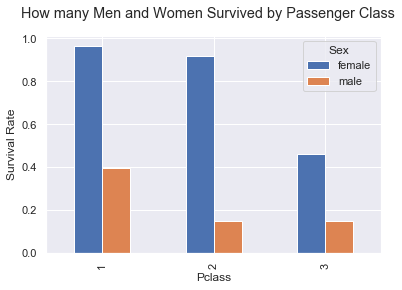

In [410]:
ptable1.plot(kind= 'bar')
plt.ylabel("Survival Rate")
plt.suptitle('How many Men and Women Survived by Passenger Class')

In [411]:
ptable2 = pd.pivot_table(df, 'Survived', 'Age Group', 'Sex')

In [412]:
ptable2

Sex          female      male
Age Group                    
Baby       0.600000  0.642857
Child      0.711111  0.318182
Adult      0.769608  0.178295
Elderly         NaN  0.125000

Text(0.5, 0.98, 'How many Men and Women Survived by Age Group')

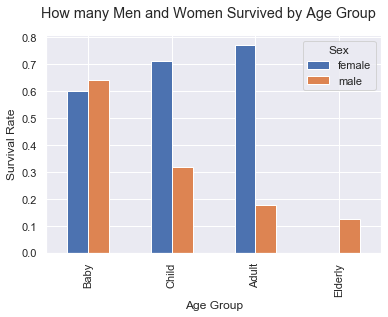

In [413]:
ptable2.plot(kind= 'bar')
plt.ylabel("Survival Rate")
plt.suptitle('How many Men and Women Survived by Age Group')

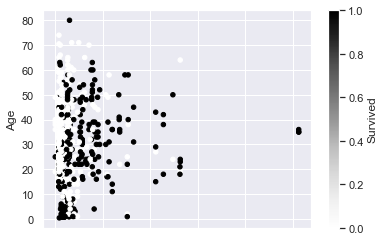

In [414]:
df.plot.scatter(x='Fare', y='Age', c='Survived')


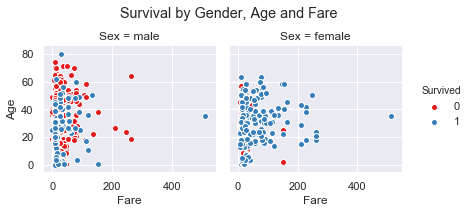

In [425]:

g= sns.FacetGrid(df, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1")
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender, Age and Fare');